## Hackout Started Code
#### Prepared by Muhammad Ammar for Hackout session on 7/15/2020

This Jupyter Notebook contains starter code that can assist you as you work through the questions outlined in the Hackout case. This starter code is a provides a quick overview of some functions and methods that might be useful during your analysis. Note: Not everything discussed in the case is present in the starter code. This code is meant to supplement the knowledge that you have gained throughout the Geekout sessions so far. Please take this starter code as a place to start and dive deeper into your analysis. 

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 

### Setting your working directory

Don't forget to set your path to where you have the AirBnB dataset saved

In [3]:
path = r'C:\Users\muammar\Documents\Python Curriculum\Airbnb'
os.chdir(path)

### Reading and Exploring the Data
Remember, we are using a csv file so Pandas can be used to easily import our data into a Pandas DataFrame

In [4]:
airbnb = pd.read_csv('airbnb.csv')

# Lets take a quick look at the data to see what the first five rows look like

airbnb.head()

C:\Users\muammar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,first_review,host_has_profile_pic,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,zipcode
0,1,1.0,Real Bed,1,1,flexible,SF,True,8/15/2016,t,...,t,1/18/2017,37.773742,-122.391503,Mission Bay,5,Apartment,95,Private room,95202\r\r\r\r\r\r\r
1,1,1.0,Real Bed,1,1,flexible,LA,False,NaN,t,...,f,NaN,34.135680,-118.400691,Studio City,6,House,100,Private room,91604-3646
2,2,1.0,Real Bed,1,1,moderate,LA,True,11/16/2011,t,...,f,4/8/2017,34.192617,-118.136794,Altadena,136,Apartment,96,Entire home/apt,91001-2243
3,2,1.0,Real Bed,1,1,flexible,LA,False,NaN,t,...,f,NaN,34.023618,-118.501174,Santa Monica,0,Apartment,96,Private room,90403-2638
4,2,1.0,Real Bed,1,1,moderate,LA,True,9/6/2010,t,...,f,2/28/2017,34.104213,-118.260040,Silver Lake,16,House,99,Private room,90039-2715


It's always a good idea to look at what data types and what columns are present in your data. Sometimes you might find that some columns can be formatted differently to make them more useful!

In [5]:
# Let's take a look at the columns present in the data

airbnb.columns

Index(['accommodates', 'bathrooms', 'bed_type', 'bedrooms', 'beds',
       'cancellation_policy', 'city', 'cleaning_fee', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'neighbourhood', 'number_of_reviews', 'property_type',
       'review_scores_rating', 'room_type', 'zipcode'],
      dtype='object')

In [52]:
# It's good practice to check the data types present in the data as well

airbnb.dtypes

accommodates                       int64
bathrooms                        float64
bed_type                          object
bedrooms                           int64
beds                               int64
cancellation_policy               object
city                              object
cleaning_fee                        bool
first_review                      object
host_has_profile_pic              object
host_identity_verified            object
host_response_rate                 int64
host_since                datetime64[ns]
instant_bookable                  object
last_review                       object
latitude                         float64
longitude                        float64
neighbourhood                     object
number_of_reviews                  int64
property_type                     object
review_scores_rating               int64
room_type                         object
zipcode                           object
dtype: object

### Let's look at some specific functions and ways we can address common questions
These functions and packages will be useful for you as you work on the case. The code might directly relate to a question that you're working on or it might give you some idea of what direction to go in.

np.where is a great way to quickly change values in a column based on a condition. Combining this with our knowledge of how to extract specific columns from dataframes can be a powerful tool!

In [54]:
# Oops it looks like the 'host_has_profile_pic' column is an object! 

print(airbnb['host_has_profile_pic'].head())

# It might be useful to have it as a binary integer (0,1)

airbnb['host_has_profile_pic'] = np.where(airbnb['host_has_profile_pic']=='t',1,0)

print(airbnb['host_has_profile_pic'].head())


0    t
1    t
2    t
3    t
4    t
Name: host_has_profile_pic, dtype: object
0    1
1    1
2    1
3    1
4    1
Name: host_has_profile_pic, dtype: int32


Errors can be pretty common for people learning Python as well as people who have been working in Python for a while. Let's see how we handle a common TypeError.

In [55]:
# Lets see if we can see the difference in days between the first review of a listing and the last review of a listing

airbnb['last_review']-airbnb['first_review']

# OOPS! Looks like we can't subtract values that are string or else we run into a TypeError


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [56]:
# Let's convert these columns to datetime variables first and then try subtracting 

airbnb['first_review'] = pd.to_datetime(airbnb['first_review'])
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])

airbnb['last_review']-airbnb['first_review']


0        156 days
1             NaT
2       1970 days
3             NaT
4       2367 days
           ...   
99564         NaT
99565         NaT
99566         NaT
99567         NaT
99568    778 days
Length: 99569, dtype: timedelta64[ns]

In [62]:
# There are quite a few missing values
# Let's make the difference in days a new column and see how many missing values are in it

airbnb['days_between_reviews'] = airbnb['last_review']-airbnb['first_review']

print('The total number of missing values in the "days_between_reviews" column is: ', airbnb['days_between_reviews'].isnull().sum())

The total number of missing values in the "days_between_reviews" column is:  41322


mean()
min()
max()

These functions should be known by everyone when analyzing a dataset. They can quickly give a person information about the dataset that might be useful when searching for answers to specific questions

In [65]:
print('The average number of reviews ', airbnb['number_of_reviews'].mean())
print('The minimum number of reviews ', airbnb['number_of_reviews'].min())
print('The maximum number of reviews ', airbnb['number_of_reviews'].max())


The average number of reviews  20.88419086261788
The minimum number of reviews  0
The maximum number of reviews  605


#### Graphs

Graphs can be incredibly useful when trying to analyze data. Depending on what questions about the data you're trying to answer you will need to use different types of graphs. It's good to continuously reference the documentation for the two most popular graphing libraries in Python, Matplotlib (plt) and Seaborn (sns).

Matplotlib: https://matplotlib.org/3.1.0/gallery/index.html 

Seaborn: https://seaborn.pydata.org/examples/index.html

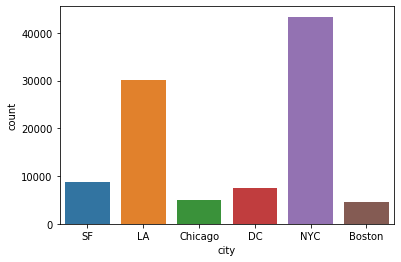

In [68]:
# Looking at how many listings are in each city

sns.countplot(x='city', data=airbnb)

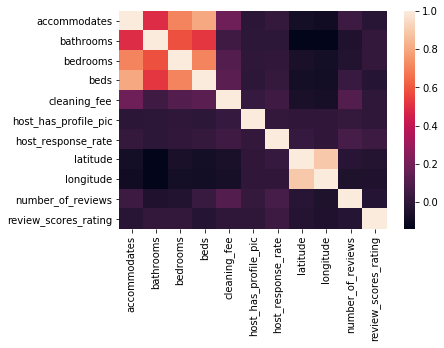

In [67]:
# A correlation matrix containing the correlations between all variables in the dataset

c = airbnb

# Make a correlation matrix calculating correlations between all the variables
corr_matrix = c.corr()

# Visualize the correlation matrix using a heatmap in Seaborn
sns.heatmap(corr_matrix)

## Resources

It is always important to keep some resources on hand when doing any work in Python. Even the best Python programmers and Data Scientists run into issues from time to time. What matters is how you can deal with the errors and issues when they arise. 

#### Documentation

The first place to start when you are not sure of what package to use or what functions/methods to use from a package/library is the documentation. Popular packages such as Pandas and Numpy are very well maintained and documented, so searching through their documentation almost always yields some valuable results. 

Pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html#user-guide

Numpy: https://numpy.org/doc/stable/

#### Google

Google is an amazing resource...if you know what you're searching for. Python is usually very good with its errors, and will try and give you as much information as possible. Sometimes googling the error itself (for example the TypeError we encountered above) might direct you to some great resources like Stack Overflow.

Stack Overflow: https://stackoverflow.com/questions/tagged/python

You will quickly learn that many of the issues that you encounter while using Python have been encountered before. The best part is that people have found solutions to many of these issues and they are available to you for free on websites like Stack Overflow. 